In [104]:
import os
import numpy as np
import scipy.io as sio
import natsort as n
import matplotlib.pyplot as plt

In [105]:
def get_mouse_data_and_score(mouseid, tag='Psyco_all', rootdir='/home/anverdie/Documents/Analysis/'):
    """ Simple function to extract data from matlab recordings
    """
    
    path = [os.path.join(rootdir, 'M' + mouseid, path, 'Stims.mat') for path in os.listdir(os.path.join(rootdir, 'M' + mouseid))]
    
    datafiles = [sio.loadmat(p) for p in path if os.path.exists(p) and tag in p]
    
    if len(datafiles):
        corrs, stims, outs = [], [], []
        for i, data in enumerate(datafiles):

            stims.append(data['ExperimentInfo']['TrialSequence'][0][0][0])
            corrs.append(data['ExperimentInfo']['Correct'][0][0][0])
            outs.append(data['ExperimentInfo']['OutComeTrials'][0][0][0])

        stims = np.array([i for s in stims for i in s])
        corrs = np.array([i for s in corrs for i in s])
        outs = np.array([i for s in outs for i in s])

        scores = {}
        for t in np.arange(3, 17):
            curr_stim = np.where(stims == t)[0]
            scores[t] = np.sum(corrs[curr_stim])/len(curr_stim)

        scs = [1 - scores[k] for k in scores]

        idx_gos = np.where(stims == 1)[0]
        idx_nogos = np.where(stims == 2)[0]
        idx_blank = np.where(stims == 0)[0]
        
        go_score = np.sum(corrs[idx_gos])/len(idx_gos)
        nogo_score = np.sum(corrs[idx_nogos])/len(idx_nogos)
        blank_score = np.sum(corrs[idx_blank])/len(idx_blank)

        data = {}
        data['raw_scores'] = scores
        data['go_score'] = go_score
        data['nogo_score'] = nogo_score
        data['blank_score'] = blank_score
        data['scores'] = scs
        
       
        return data

In [106]:
def get_stims(tag, rootdir='/home/anverdie/Documents/Analysis/Stims'):
    """ Load stims numpy array depending on tag
    """
    stims = [np.load(os.path.join(rootdir, f)) for f in n.natsorted(os.listdir(rootdir)) if tag in f]
    names = [f[:-4] for f in n.natsorted(os.listdir(rootdir)) if tag in f]
    return stims, names

In [107]:
# Retrieve data for mouse depending on task
m1 = get_mouse_data_and_score('786658', tag='Psyco_all_')
m2 = get_mouse_data_and_score('786656', tag='Psyco_all_')

m1_am = get_mouse_data_and_score('786658', tag='Psyco_allam_')
m2_am = get_mouse_data_and_score('786656', tag='Psyco_allam_')

(-0.1, 1.1)

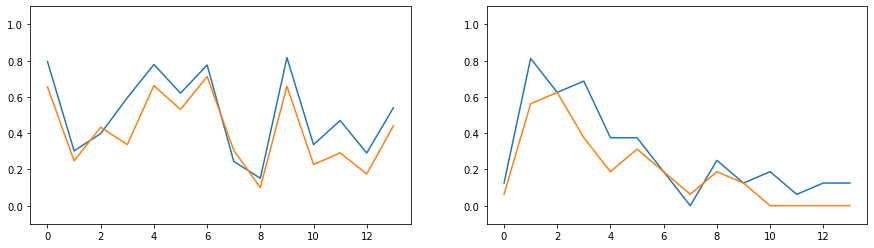

In [108]:
# Plot prob of lick of the two tasks
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].plot(m2['scores'])
axs[0].plot(m1['scores'])
axs[0].set_ylim(-0.1, 1.1)

axs[1].plot(m2_am['scores'])
axs[1].plot(m1_am['scores'])
axs[1].set_ylim(-0.1, 1.1)

In [109]:
stims, names = get_stims('PT')
stims_am, names_am = get_stims('AM')

# Correct for stims_am since go is PT
stims_am[0], stims_am[-1] = stims[0], stims[-1]
names_am[0], names_am[-1] = names[0], names[-1]

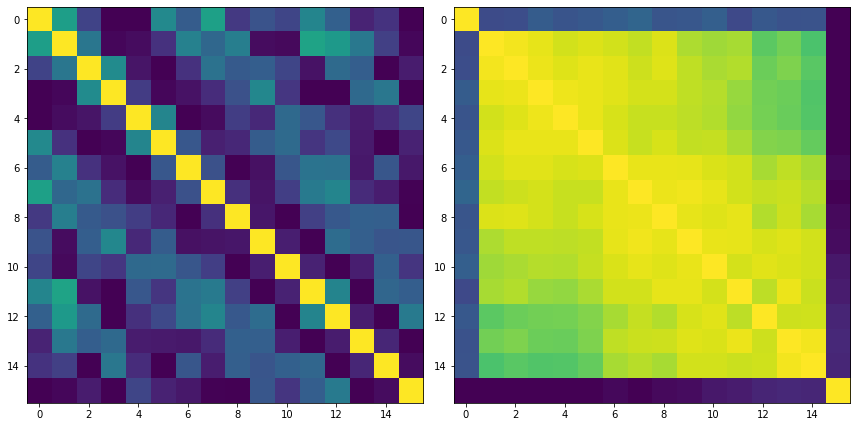

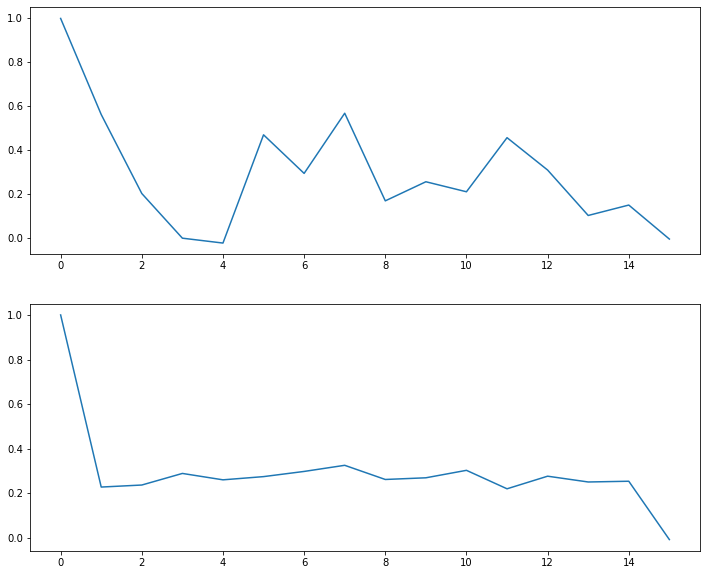

In [121]:
# Plot autocorr matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 10))
corr_matrix = np.corrcoef(np.array([s.flatten() for s in stims]))
corr_matrix_am = np.corrcoef(np.array([s.flatten() for s in stims_am]))

axs[0].imshow(corr_matrix, vmin=0, vmax=1)
axs[1].imshow(corr_matrix_am, vmin=0, vmax=1)

plt.tight_layout()
plt.show()
plt.close()

fig, axs = plt.subplots(2, figsize=(12, 10))

axs[0].plot(corr_matrix[0, :])
axs[1].plot(corr_matrix_am[0, :])


In [123]:
for n in names_am: print(n)

PT_6000Hz_500ms_70dB_latent
AM_23Hz_500ms_70dB_latent
AM_27Hz_500ms_70dB_latent
AM_31Hz_500ms_70dB_latent
AM_36Hz_500ms_70dB_latent
AM_43Hz_500ms_70dB_latent
AM_50Hz_500ms_70dB_latent
AM_58Hz_500ms_70dB_latent
AM_68Hz_500ms_70dB_latent
AM_79Hz_500ms_70dB_latent
AM_92Hz_500ms_70dB_latent
AM_108Hz_500ms_70dB_latent
AM_126Hz_500ms_70dB_latent
AM_147Hz_500ms_70dB_latent
AM_171Hz_500ms_70dB_latent
PT_16000Hz_500ms_70dB_latent
